# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
#загрузим всё, что может пригодиться
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
try:
    df= pd.read_csv('/datasets/users_behavior.csv')
except:
    df=pd.read_csv('/Users/aleksandrivanov/Downloads/users_behavior.csv')

In [3]:
df.head(20)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


минуты и звонки корреляция почти 1 в 1, возможно, можно что-то выбрать одно для дальнейшего исследования

## Разбейте данные на выборки

In [6]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

Разобьем переменные в 2 этапа, в начале выделим тестовую модельв 20%, а потом оставшуюся часть разобьем ещё раз, добавим вспомогательную переменную _help

In [7]:
features_help, features_test, target_help, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345, stratify = target)

In [8]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_help, target_help, test_size=0.25, random_state=12345, stratify = target_help)

Итоговые переменные, которые будут испозоваться для обучения модели:
тестовые, последний этап, 20%:
features_test
target_test
Для обучения модели, 60%:
features_train
target_train
Для промежучной проверки, 20%:
features_valid
target_valid

In [9]:
features_test

,calls,minutes,messages,mb_used
2424,56.0,364.36,0.0,14129.94
2118,76.0,430.70,34.0,25138.49
2034,108.0,812.04,4.0,24490.28
2286,67.0,460.76,27.0,16626.26
1364,69.0,515.52,34.0,21231.90
...,...,...,...,...
2295,10.0,61.30,0.0,958.19
2327,58.0,370.03,29.0,33526.69
1983,44.0,293.54,51.0,11816.92
2315,48.0,341.65,0.0,19000.02


In [10]:
target_test

2424    0
2118    0
2034    1
2286    0
1364    0
       ..
2295    0
2327    1
1983    0
2315    0
873     0
Name: is_ultra, Length: 643, dtype: int64

In [11]:
features_train

,calls,minutes,messages,mb_used
1659,27.0,170.58,23.0,21798.61
2176,75.0,489.47,7.0,20478.94
108,47.0,300.12,123.0,31244.61
426,36.0,198.96,32.0,21596.86
1892,102.0,740.28,19.0,17864.12
...,...,...,...,...
2298,64.0,475.68,20.0,8540.27
397,80.0,547.01,54.0,21265.57
1439,38.0,275.74,16.0,7122.54
3151,84.0,622.60,32.0,16318.74


In [12]:
target_train

1659    0
2176    1
108     1
426     0
1892    0
       ..
2298    0
397     0
1439    0
3151    0
607     1
Name: is_ultra, Length: 1928, dtype: int64

In [13]:
features_valid

,calls,minutes,messages,mb_used
580,43.0,321.63,42.0,25599.87
2272,93.0,658.89,38.0,17655.47
1415,82.0,507.89,88.0,17543.37
1356,43.0,256.90,1.0,10450.48
1910,111.0,728.20,37.0,14135.23
...,...,...,...,...
3133,56.0,385.68,28.0,18148.98
2268,10.0,78.67,8.0,4986.91
49,58.0,474.92,11.0,17858.59
1980,47.0,367.09,42.0,22329.28


In [14]:
target_valid

580     1
2272    1
1415    1
1356    0
1910    0
       ..
3133    0
2268    0
49      0
1980    0
2867    0
Name: is_ultra, Length: 643, dtype: int64

## Исследуйте модели

В данном проекте у нас задача классификации, поэтому используем 2 варианта, это одно дерево с разной глубиной, либо "случайный лес"

In [28]:
%%time
best_model_tr = None
best_result = 0
for depth in tqdm(range(1,100)):
    model_tr = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tr.fit(features_train, target_train)
    predictions_valid = model_tr.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)
    if result > best_result:
        best_model_tr = model_tr 
        best_result = result 
        best_depth = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print("количество этажей у дерева", best_depth)

100%|██████████████████████████████████████████| 99/99 [00:00<00:00, 147.17it/s]

Accuracy наилучшей модели на валидационной выборке: 0.8164852255054432
количество этажей у дерева 5
CPU times: user 673 ms, sys: 7.87 ms, total: 681 ms
Wall time: 679 ms


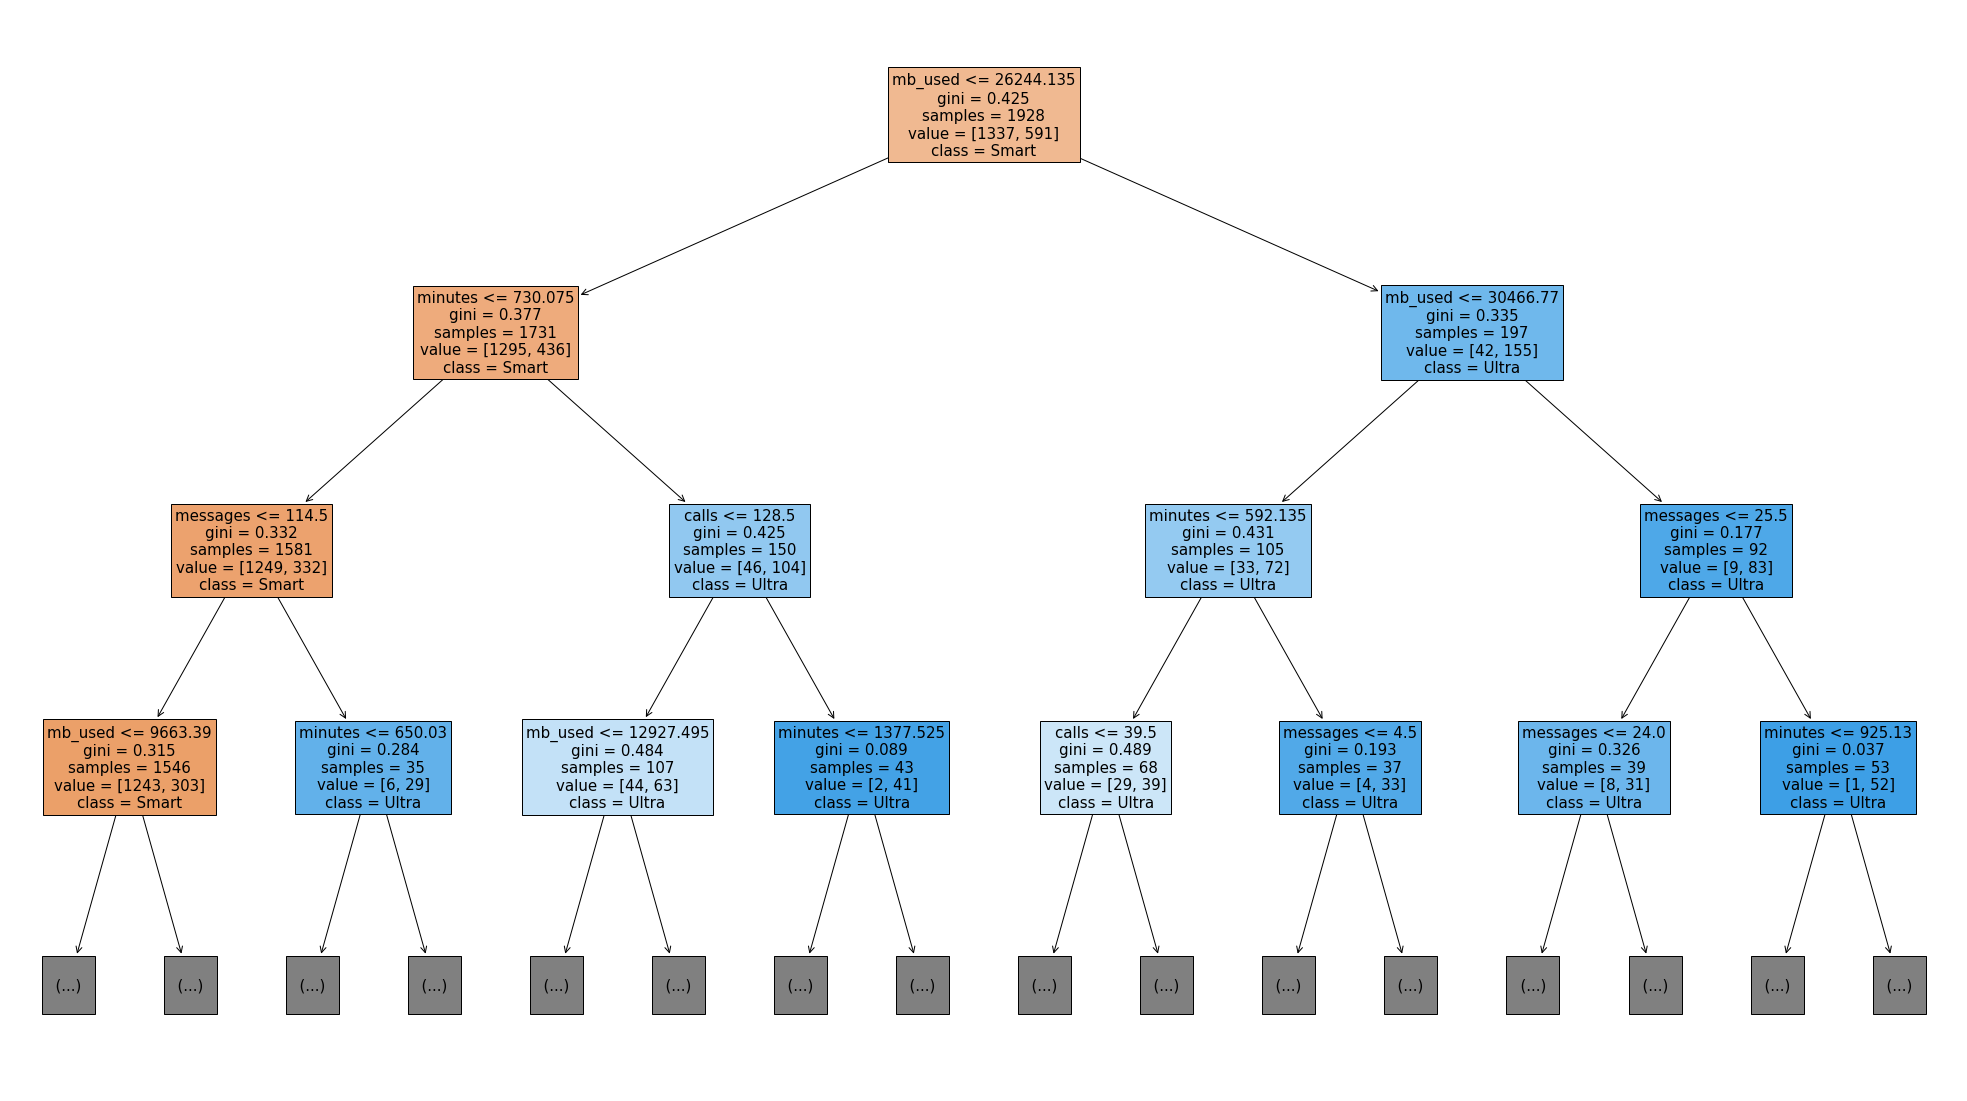

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(best_model_tr, 
               feature_names=features.columns.values, 
               class_names=['Smart','Ultra'],
               filled=True,
               fontsize = 15,
               max_depth = 3     # Это чтобы прорисовывало 3 уровня, не глубже
                  )

<b>А теперь посчитаем целый лес</b>

In [27]:
%%time
best_model_rf = None
best_result = 0
for est in tqdm(range(1, 20)):
    for depth in range (1,20):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rf.fit(features_train, target_train) 
        result = model_rf.score(features_valid, target_valid) 
        if result > best_result:
            best_model_rf = model_rf 
            best_result = result 
            best_est = est
            best_dep = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print("количество деревье", best_est)
print ('глубина дерева', best_dep)

100%|███████████████████████████████████████████| 19/19 [00:07<00:00,  2.52it/s]

Accuracy наилучшей модели на валидационной выборке: 0.8320373250388803
количество деревье 10
глубина дерева 8
CPU times: user 7.52 s, sys: 38.7 ms, total: 7.56 s
Wall time: 7.56 s


Случайный лес побеждает

## Проверьте модель на тестовой выборке

проверим случайный лес

In [18]:
result = best_model_rf.score(features_test, target_test) 
print(result)

0.8102643856920684


Окончательный вывод: наилучшие результаты показала модель случайный лес с 65 деревьями

In [19]:
#попробуем объединить переменные и сделать обучение на них
features_new = pd.concat((features_train, features_valid), axis=0)
target_new = pd.concat((target_train, target_valid), axis=0)

In [20]:
model_new = RandomForestClassifier(random_state=12345, n_estimators=65) 
model_new.fit(features_new, target_new) 
result = model_new.score(features_test, target_test) 
print(result)
#эксперимент не удался

0.7993779160186625


Вывод: наиболее точная модель построенная по принципу "случайный лес", но она же и считает дольше. Разница дерева с лесом не критично высокая, поэтому если требуется посчитать как можно быстрее, то допускается использование дерево, но если приоритете на точность, то необходимо использовать модель построенную через "случайный лес", требуемое значение на тестовой сборке в 0.75 модель прошла

## (бонус) Проверьте модели на адекватность

In [21]:
# добрый день! можно подсказку, как тут делать?
df["is_ultra"].value_counts(normalize=True)


0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Если бы наша модель предсказывала бы только всегда тариф смарт, 
то она была бы права в 69% случаев, но у нас значение выше 75%, значит относительно настолько прямолинейной модели наша адекватнее

In [42]:
#построение модели через dummy
from sklearn.dummy import DummyClassifier
model_test = DummyClassifier(strategy='most_frequent', random_state=1)
model_test.fit(features_train, target_train)
predict= model_test.predict(features_test)
model_test.score(predict, target_test)

0.6936236391912908